<a href="https://colab.research.google.com/github/SaqlainHussainShah/implementation-of-sdi/blob/master/Separate_Notebook_A_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps for implementation
#### Reading CSV
#### Data Description
#### Data Cleaning
#### Data Normalization
#### Features
#### Applying KNN and NB
#### Confusion Matrix

In [0]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

### Reading CSV

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df1=pd.read_csv("/content/drive/My Drive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/My Drive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/My Drive/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/drive/My Drive/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/drive/My Drive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/drive/My Drive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/drive/My Drive/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/drive/My Drive/Wednesday-workingHours.pcap_ISCX.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [0]:
del df1,df2,df3,df4,df5,df6,df7,df8


In [0]:
# category A attacks
df_bot=df[df[' Label']=='Bot']
df_ddos=df[df[' Label']=='DDoS']
df_golden_eye=df[df[' Label']=='DoS GoldenEye']
df_hulk=df[df[' Label']=='DoS Hulk']
df_ssh_patator=df[df[' Label']=='SSH-Patator']
df_ftp_patator=df[df[' Label']=='FTP-Patator']
df_infiltration=df[df[' Label']=='Infiltration']

In [0]:
# benign data
df_benign=df[df[' Label']=='BENIGN']

In [0]:
df_cat_A=pd.concat([df_bot,df_ddos,df_golden_eye,df_hulk,df_ssh_patator,df_infiltration,df_ftp_patator, df_benign])
df_cat_A.groupby(' Label').first()


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,4000000,666666.6667,3.000000e+00,0.000000e+00,3.0,3.0,3.0,3.000,0.000000e+00,3.0,3.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,...,6.0,6.0,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0.0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Bot,192.168.10.12-52.6.13.28-42544-8080-6,192.168.10.12,42544,52.6.13.28,8080,6,7/7/2017 9:34,60202640,9,9,322.0,256.0,322.0,0.0,35.777778,107.333333,256.0,0.0,28.444444,85.333333,9.600907867,0.29899021,3.541332e+06,4.901981e+06,10200000.0,47.0,51200000.0,6396441.875,5.268490e+06,10200000.0,234.0,60200000.0,7.518954e+06,4.645137e+06,10300000.0,637.0,0,0,0,0,...,0.0,322.0,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1.0,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
DDoS,172.16.0.1-192.168.10.50-49650-80-6,172.16.0.1,49650,192.168.10.50,80,6,7/7/2017 3:56,1293792,3,7,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1658.142857,2137.297080,8991.398927,7.72921768,1.437547e+05,4.308658e+05,1292730.0,2.0,747.0,373.500,5.239661e+02,744.0,3.0,1293746.0,2.156243e+05,5.276719e+05,1292730.0,2.0,0,0,0,0,...,0.0,5840.0,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2.0,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS GoldenEye,172.16.0.1-192.168.10.50-58958-80-6,172.16.0.1,58958,192.168.10.50,80,6,5/7/2017 11:10,5008837,4,5,341.0,3525.0,341.0,0.0,85.250000,170.500000,2077.0,0.0,705.000000,990.644740,771.836,1.79682,6.261046e+05,1.768253e+06,5002306.0,47.0,6531.0,2177.000,4.969145e+02,2615.0,1637.0,5008656.0,1.252164e+06,2.500883e+06,5003487.0,49.0,0,0,0,0,...,0.0,2077.0,386.600000,747.760984,5.591465e+05,0,0,0,1,0,0,0,0,1.0,429.555556,85.250000,705.000000,136,0,0,0,0,0,0,4,341,5,3525,29200,235,1,32,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Hulk,172.16.0.1-192.168.10.50-50748-80-6,172.16.0.1,50748,192.168.10.50,80,6,5/7/2017 10:43,1878,3,6,382.0,11595.0,382.0,0.0,127.333333,220.547803,4355.0,0.0,1932.500000,2182.468304,6.37753e+06,4792.332268,2.347500e+02,2.291299e+02,577.0,15.0,975.0,487.500,2.651650e+02,675.0,300.0,1780.0,3.560000e+02,3.997881e+02,950.0,15.0,0,0,0,0,...,0.0,4355.0,1197.700000,1886.332364,3.558250e+06,0,0,0,1,0,0,0,0,2.0,1330.777778,127.333333,1932.500000,104,0,0,0,0,0,0,3,382,6,11595,29200,235,1,32,0.0,0.000

In [0]:
del df_bot,df_ddos,df_golden_eye,df_hulk,df_ssh_patator,df_ftp_patator,df_infiltration, df_benign

In [0]:
df=df_cat_A.copy()

In [0]:
del df_cat_A

In [0]:
df.groupby(' Label').first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,4000000,666666.6667,3.000000e+00,0.000000e+00,3.0,3.0,3.0,3.000,0.000000e+00,3.0,3.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,...,6.0,6.0,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0.0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Bot,192.168.10.12-52.6.13.28-42544-8080-6,192.168.10.12,42544,52.6.13.28,8080,6,7/7/2017 9:34,60202640,9,9,322.0,256.0,322.0,0.0,35.777778,107.333333,256.0,0.0,28.444444,85.333333,9.600907867,0.29899021,3.541332e+06,4.901981e+06,10200000.0,47.0,51200000.0,6396441.875,5.268490e+06,10200000.0,234.0,60200000.0,7.518954e+06,4.645137e+06,10300000.0,637.0,0,0,0,0,...,0.0,322.0,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1.0,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
DDoS,172.16.0.1-192.168.10.50-49650-80-6,172.16.0.1,49650,192.168.10.50,80,6,7/7/2017 3:56,1293792,3,7,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1658.142857,2137.297080,8991.398927,7.72921768,1.437547e+05,4.308658e+05,1292730.0,2.0,747.0,373.500,5.239661e+02,744.0,3.0,1293746.0,2.156243e+05,5.276719e+05,1292730.0,2.0,0,0,0,0,...,0.0,5840.0,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2.0,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS GoldenEye,172.16.0.1-192.168.10.50-58958-80-6,172.16.0.1,58958,192.168.10.50,80,6,5/7/2017 11:10,5008837,4,5,341.0,3525.0,341.0,0.0,85.250000,170.500000,2077.0,0.0,705.000000,990.644740,771.836,1.79682,6.261046e+05,1.768253e+06,5002306.0,47.0,6531.0,2177.000,4.969145e+02,2615.0,1637.0,5008656.0,1.252164e+06,2.500883e+06,5003487.0,49.0,0,0,0,0,...,0.0,2077.0,386.600000,747.760984,5.591465e+05,0,0,0,1,0,0,0,0,1.0,429.555556,85.250000,705.000000,136,0,0,0,0,0,0,4,341,5,3525,29200,235,1,32,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Hulk,172.16.0.1-192.168.10.50-50748-80-6,172.16.0.1,50748,192.168.10.50,80,6,5/7/2017 10:43,1878,3,6,382.0,11595.0,382.0,0.0,127.333333,220.547803,4355.0,0.0,1932.500000,2182.468304,6.37753e+06,4792.332268,2.347500e+02,2.291299e+02,577.0,15.0,975.0,487.500,2.651650e+02,675.0,300.0,1780.0,3.560000e+02,3.997881e+02,950.0,15.0,0,0,0,0,...,0.0,4355.0,1197.700000,1886.332364,3.558250e+06,0,0,0,1,0,0,0,0,2.0,1330.777778,127.333333,1932.500000,104,0,0,0,0,0,0,3,382,6,11595,29200,235,1,32,0.0,0.000

In [0]:
# remove some data
df=df.iloc[0:-1000000]

### Data Description

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658327 entries, 24072 to 41045
Data columns (total 85 columns):
Flow ID                         1658327 non-null object
 Source IP                      1658327 non-null object
 Source Port                    1658327 non-null int64
 Destination IP                 1658327 non-null object
 Destination Port               1658327 non-null int64
 Protocol                       1658327 non-null int64
 Timestamp                      1658327 non-null object
 Flow Duration                  1658327 non-null int64
 Total Fwd Packets              1658327 non-null int64
 Total Backward Packets         1658327 non-null int64
Total Length of Fwd Packets     1658327 non-null float64
 Total Length of Bwd Packets    1658327 non-null float64
 Fwd Packet Length Max          1658327 non-null float64
 Fwd Packet Length Min          1658327 non-null float64
 Fwd Packet Length Mean         1658327 non-null float64
 Fwd Packet Length Std          1658327 non-nu

In [0]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1658327.0,1.658327e+06,1658327.0,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1658327.0,1658327.0,1658327.0,1658327.0,1658327.0,1658327.0,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06,1.658327e+06
mean,4.113776e+04,7.572363e+03,9.554531e+00,1.782814e+07,8.909404e+00,9.643787e+00,5.681915e+02,1.492424e+04,2.325808e+02,1.837052e+01,6.396359e+01,8.034237e+01,1.230778e+03,3.777263e+01,4.190623e+02,4.939413e+02,1.613991e+06,3.927782e+06,1.275328e+07,1.971742e+05,1.747405e+07,3.199823e+06,4.749022e+06,1.258684e+07,1.003574e+06,1.025147e+07,1.833903e+06,1.857075e+06,5.550040e+06,8.730208e+05,4.401122e-02,0.0,1.899505e-04,0.0,-4.079333e+03,-8.303144e+02,7.372067e+04,5.299879e+03,1.519796e+01,1.326971e+03,2.259286e+02,4.158926e+02,7.724129e+05,4.943898e-02,4.401122e-02,1.537694e-04,2.651365e-01,3.650565e-01,9.618791e-02,1.899505e-04,1.543724e-04,6.619165e-01,2.507589e+02,6.396359e+01,4.190623e+02,-4.079333e+03,0.0,0.0,0.0,0.0,0.0,0.0,8.909404e+00,5.681736e+02,9.643787e+00,1.492475e+04,6.283144e+03,1.841917e+03,5.935295e+00,-1.137839e+03,7.729532e+04,3.436935e+04,1.387728e+05,5.802418e+04,1.174084e+07,7.248805e+05,1.226024e+07,1.119382e+07
std,2.219584e+04,1.810977e+04,5.150035e+00,3.602554e+07,7.226696e+02,9.593434e+02,1.202595e+04,2.185725e+06,8.058106e+02,6.824701e+01,2.110287e+02,3.261509e+02,2.387268e+03,6.780479e+01,7.343826e+02,1.045130e+03,4.872856e+06,9.135345e+06,2.909488e+07,3.348099e+06,3.598512e+07,9.781579e+06,1.176696e+07,2.920780e+07,8.467285e+06,2.895937e+07,8.521165e+06,7.152813e+06,1.917948e+07,7.915001e+06,2.051201e-01,0.0,1.378095e-02,0.0,2.040304e+06,3.513184e+05,2.710471e+05,3.484152e+04,2.346902e+01,2.463622e+03,3.612137e+02,7.742689e+02,2.088798e+06,2.167828e-01,2.051201e-01,1.239943e-02,4.414060e-01,4.814461e-01,2.948489e-01,1.378095e-02,1.242372e-02,7.744814e-01,3.941016e+02,2.110287e+02,7.343826e+02,2.040304e+06,0.0,0.0,0.0,0.0,0.0,0.0,7.226696e+02,1.20

In [0]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

### Data Cleaning

In [0]:

df2=df[df.columns[7:-1]]
df2[' Label']=df[' Label']
df=df2
df2=[]
del df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
len(df.columns)

79

In [0]:

df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
df=df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=False)

In [0]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


df["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

df[" Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df[" Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" CWE Flag Count"].replace("Infinity", 0, inplace=True)
df[" CWE Flag Count"].replace(",,", 0, inplace=True)
df[" CWE Flag Count"].replace(np.nan, 0, inplace=True)

df[" Bwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd URG Flags"].replace(",,", 0, inplace=True)
df[" Bwd URG Flags"].replace(np.nan, 0, inplace=True)

df[" Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd PSH Flags"].replace(",,", 0, inplace=True)
df[" Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

df[" Fwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Fwd URG Flags"].replace(",,", 0, inplace=True)
df[" Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [0]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float64")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")

In [0]:
df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")

In [0]:
pd.set_option('display.max_rows', df.shape[0])

In [0]:
df.replace('Infinity',0.0, inplace=True)

In [0]:
df.replace('NaN',0.0, inplace=True)

In [0]:
df.columns

Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SY

In [0]:


X=df[df.columns[0:-1]]
y=df[df.columns[-1]]

del df

### Data Normalization

In [0]:
from scipy import stats

In [0]:


cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])



/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [0]:
X.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
24072,1.175622,0.000119,-0.000677,-0.020496,-0.006713,0.110746,-0.269271,-0.133722,0.082570,-0.408562,-0.557317,-0.532155,-0.391173,-0.054688,-0.285923,0.395195,0.106332,-0.088020,-0.058897,0.936669,0.326491,0.043871,-0.081979,-0.118535,1.724057,0.666820,0.389497,0.247396,-0.110256,-0.214636,NaN,-0.013788,NaN,0.002145,0.003206,-0.272080,-0.152160,-0.647876,-0.408182,-0.541553,-0.418853,-0.365894,-0.228136,-0.214636,-0.012405,1.664086,-0.757572,-0.326308,-0.013788,-0.01243,0.435984,-0.555108,-0.133722,-0.532155,NaN,NaN,NaN,NaN,NaN,NaN,0.000119,-0.020527,-0.000677,-0.006713,1.622839,-0.213111,-0.007156,0.003746,-0.021995,-0.034279,-0.036964,-0.012821,-0.054835,-0.120200,-0.071076,-0.039378
24677,-0.493470,-0.010947,-0.009014,-0.047263,-0.006830,-0.288732,-0.269271,-0.303212,-0.246420,-0.515772,-0.557317,-0.570879,-0.472801,-0.054689,-0.285799,-0.319464,-0.430121,-0.436516,-0.041626,-0.485787,-0.327246,-0.403743,-0.431108,-0.118563,-0.354125,-0.215291,-0.259719,-0.289476,-0.110336,-0.214636,NaN,-0.013788,NaN,0.002016,0.002455,-0.272016,-0.151669,-0.647876,-0.538853,-0.625755,-0.537368,-0.369926,-0.228136,-0.214636,-0.012405,-0.600931,1.320006,3.064585,-0.013788,-0.01243,0.435984,-0.636572,-0.303212,-0.570879,NaN,NaN,NaN,NaN,NaN,NaN,-0.010947,-0.047337,-0.009014,-0.006830,-0.428402,-0.213111,-0.008605,0.003746,-0.124474,-0.097115,-0.143825,-0.104099,-0.416036,-0.126284,-0.421603,-0.400569
56376,-0.491335,-0.006798,-0.006930,-0.030139,-0.006769,-0.048052,-0.269271,-0.059241,0.044896,-0.462167,-0.557317,-0.510071,-0.403707,-0.054582,-0.285736,-0.326731,-0.424295,-0.433999,-0.058874,-0.482042,-0.322653,-0.397275,-0.426561,-0.118451,-0.349541,-0.207502,-0.246925,-0.282642,-0.110126,-0.214636,NaN,-0.013788,NaN,0.002045,0.002569,-0.271971,-0.151526,-0.647876,-0.460126,-0.508119,-0.440153,-0.367213,-0.228136,-0.214636,-0.012405,1.664086,-0.757572,-0.326308,-0.013788,-0.01243,-0.855075,-0.513350,-0.059241,-0.510071,NaN,NaN,NaN,NaN,NaN,NaN,-0.006798,-0.030185,-0.006930,-0.006769,0.134993,-0.197490,-0.004258,0.003707,-0.124474,-0.097115,-0.143825,-0.104099,-0.416036,-0.126284,-0.421603,-0.400569
56401,-0.495074,-0.010947,-0.009014,-0.046764,-0.006828,-0.281288,-0.181382,-0.274788,-0.246420,-0.513260,-0.468848,-0.562711,-0.472801,-0.048631,-0.199745,-0.331324,-0.430121,-0.438502,-0.058886,-0.485787,-0.327246,-0.403743,-0.431108,-0.118563,-0.354125,-0.215291,-0.259719,-0.289476,-0.110336,-0.214636,NaN,-0.013788,NaN,0.002010,0.002421,-0.228172,0.189410,-0.392268,-0.536418,-0.609148,-0.537368,-0.369926,-0.228136,-0.214636,-0.012405,-0.600931,1.320006,3.064585,-0.013788,-0.01243,0.435984,-0.613740,-0.274788,-0.562711,NaN,NaN,NaN,NaN,NaN,NaN,-0.010947,-0.046837,-0.009014,-0.006827,-0.428402,-0.195153,-0

### Feature Selection

In [0]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Packets/s',' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Flow Bytes/s", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets']



In [0]:
X=X[features].copy() # for k means
X.head()

,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
24072,-0.391173,-0.020496,-0.058897,-0.269271,-0.285923,-0.133722
24677,-0.472801,-0.047263,-0.041626,-0.269271,-0.285799,-0.303212
56376,-0.403707,-0.030139,-0.058874,-0.269271,-0.285736,-0.059241
56401,-0.472801,-0.046764,-0.058886,-0.181382,-0.199745,-0.274788
56596,-0.403707,-0.030139,-0.058888,-0.269271,-0.285726,-0.059241


In [0]:
len(X.columns)

6

### Applying Algorithms

In [0]:
from sklearn.model_selection import train_test_split     # import module for train test split

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [0]:
y_test_arr=y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
def calculate_confusion_matrix(y_test_arr,yhat):
  true={}
  false={}
  not_detected={}

  for x in range(len(y_test_arr)):
      if y_test_arr[x]==yhat[x]:
        if y_test_arr[x] in true:
          true[y_test_arr[x]]=true[y_test_arr[x]]+1
        else:
          true[y_test_arr[x]]=1
      elif y_test_arr[x]!=yhat[x]:
        if yhat[x] in false:
          false[yhat[x]]=false[yhat[x]]+1

          if y_test_arr[x] in not_detected:
            not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
          else:
            not_detected[y_test_arr[x]]=1

        else:
          false[yhat[x]]=1

          if y_test_arr[x] in not_detected:
            not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
          else:
            not_detected[y_test_arr[x]]=1
            
  print("========================================")
  print(" True values :: ", true)
  print(" False values :: ", false)
  print(" not detected values :: ", not_detected)    
  print("========================================")

#### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
t1=time.time()

for i in range(1,len(X_train.columns)+1):
    knn=KNeighborsClassifier(n_neighbors=i)
    model_knn=knn.fit(X_train,y_train)
    yhat=model_knn.predict(X_test)
    print("for " , i,  " as K, accuracy is : ", accuracy_score(y_test, yhat))
t2=time.time()
print(" time for ", i ," k's :: ", (t2-t1)/60 , " minutes")

for  1  as K, accuracy is :  0.9856327821173092
for  2  as K, accuracy is :  0.9870477811065956
for  3  as K, accuracy is :  0.9876300728015471
for  4  as K, accuracy is :  0.9877809255722599
for  5  as K, accuracy is :  0.9877447209072889
for  6  as K, accuracy is :  0.9877115332977321
for  7  as K, accuracy is :  0.9877115332977321
for  8  as K, accuracy is :  0.9877537720735317
for  9  as K, accuracy is :  0.9876361069123757
for  10  as K, accuracy is :  0.9877085162423178
for  11  as K, accuracy is :  0.9875727487486763
for  12  as K, accuracy is :  0.9875667146378477
for  13  as K, accuracy is :  0.9875093905849769
for  14  as K, accuracy is :  0.987488271197077
for  15  as K, accuracy is :  0.9874279300887919
for  16  as K, accuracy is :  0.9873856913129924
 time for  16  k's ::  41.03060241540273  minutes


In [0]:
calculate_confusion_matrix(y_test_arr,yhat)

 True values ::  {'BENIGN': 251848, 'DoS GoldenEye': 1965, 'DoS Hulk': 45611, 'DDoS': 25482, 'FTP-Patator': 1578, 'SSH-Patator': 625, 'Bot': 159}
 False values ::  {'BENIGN': 1600, 'DoS Hulk': 2329, 'DDoS': 88, 'Bot': 35, 'DoS GoldenEye': 110, 'FTP-Patator': 18, 'SSH-Patator': 1}
 not detected values ::  {'DoS Hulk': 625, 'SSH-Patator': 615, 'BENIGN': 2564, 'DDoS': 61, 'DoS GoldenEye': 75, 'Bot': 224, 'Infiltration': 6, 'FTP-Patator': 11}


In [0]:
import pickle
filename = 'drive/My Drive/model_cat_A.sav'

In [0]:
pickle.dump(model_knn, open(filename, 'wb'))

In [0]:
# to load model
model_knn = pickle.load(open(filename, 'rb'))
y_hat=model_knn.predict(X_test)

#### Naive Bayes

##### Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
t1=time.time()

gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
yhat_gnb=model_gnb.predict(X_test)

print("Accuracy :: ", accuracy_score(y_test,yhat_gnb))

t2=time.time()
print(" time for Naive Baye's :: ", (t2-t1) , " seconds")

Accuracy ::  0.2371948625580406
 time for Naive Baye's ::  3.5282604694366455  seconds


In [0]:
calculate_confusion_matrix(y_test_arr,yhat_gnb)

 True values ::  {'BENIGN': 29605, 'DoS GoldenEye': 2015, 'DoS Hulk': 19922, 'DDoS': 24113, 'FTP-Patator': 1579, 'SSH-Patator': 1227, 'Bot': 151, 'Infiltration': 6}
 False values ::  {'Bot': 87750, 'DoS GoldenEye': 46565, 'SSH-Patator': 99361, 'Infiltration': 611, 'DoS Hulk': 11718, 'DDoS': 6150, 'BENIGN': 68, 'FTP-Patator': 608}
 not detected values ::  {'BENIGN': 224807, 'DoS Hulk': 26314, 'DDoS': 1430, 'Bot': 232, 'DoS GoldenEye': 25, 'FTP-Patator': 10, 'SSH-Patator': 13}


##### Bernoulli Naive Bayes

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:


clf = BernoulliNB()
clf.fit(X_train, y_train)
yhat_bnb=clf.predict(X_test)
print("Accuracy ::: ", accuracy_score(y_test,yhat_bnb))



Accuracy :::  0.7971030233912306


In [0]:
calculate_confusion_matrix(y_test_arr,yhat_bnb)

 True values ::  {'BENIGN': 222101, 'DoS GoldenEye': 1357, 'DoS Hulk': 28234, 'DDoS': 11881, 'SSH-Patator': 620, 'Infiltration': 6}
 False values ::  {'DoS GoldenEye': 7919, 'DoS Hulk': 14775, 'BENIGN': 27397, 'Infiltration': 11672, 'SSH-Patator': 3310, 'DDoS': 2177}
 not detected values ::  {'BENIGN': 32311, 'DoS Hulk': 18002, 'DDoS': 13662, 'FTP-Patator': 1589, 'SSH-Patator': 620, 'DoS GoldenEye': 683, 'Bot': 383}


#### K Means Clustering

##### Preprocessing

In [0]:
features=['Flow ID', " Bwd Packet Length Std","Total Length of Fwd Packets",' Flow IAT Min',' Fwd Packet Length Min',' Flow Packets/s'," Fwd Packet Length Mean",' Label']

df=df[features].copy()

df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
24072,322.0,4.901981e+06,107.333333,51200000.0,0.29899021,60202640,35.777778,256.0,9.600907867,322.0,3.541332e+06,28.444444,10200000.0,85.333333,9,9
24677,0.0,0.000000e+00,0.000000,0.0,34.54768444,57891,0.000000,0.0,0,0.0,5.789100e+04,0.000000,57891.0,0.000000,1,1
56376,194.0,5.323091e+04,95.042096,134812.0,51.92416105,134812,51.500000,134.0,2522.03068,206.0,2.246867e+04,44.666667,131123.0,72.231111,4,3
56401,6.0,0.000000e+00,0.000000,0.0,23809.52381,84,6.000000,6.0,142857.1429,6.0,8.400000e+01,6.000000,84.0,0.000000,1,1
56596,194.0,5.045570e+04,95.042096,127781.0,54.78122726,127781,51.500000,134.0,2660.802467,206.0,2.129683e+04,44.666667,124286.0,72.231111,4,3


In [0]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
df.replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")
df.replace('Infinity',0.0, inplace=True)
df.replace('NaN',0.0, inplace=True)


In [0]:
X=df[df.columns[1:-1]]
y=df[df.columns[-1]]

In [0]:
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
24072,322.0,4.901981e+06,107.333333,51200000.0,0.298990,60202640,35.777778,256.0,9.600907867,322.0,3.541332e+06,28.444444,10200000.0,85.333333,9,9
24677,0.0,0.000000e+00,0.000000,0.0,34.547684,57891,0.000000,0.0,0,0.0,5.789100e+04,0.000000,57891.0,0.000000,1,1
56376,194.0,5.323091e+04,95.042096,134812.0,51.924161,134812,51.500000,134.0,2522.03068,206.0,2.246867e+04,44.666667,131123.0,72.231111,4,3
56401,6.0,0.000000e+00,0.000000,0.0,23809.523810,84,6.000000,6.0,142857.1429,6.0,8.400000e+01,6.000000,84.0,0.000000,1,1
56596,194.0,5.045570e+04,95.042096,127781.0,54.781227,127781,51.500000,134.0,2660.802467,206.0,2.129683e+04,44.666667,124286.0,72.231111,4,3


In [0]:
df.to_csv("/content/drive/My Drive/6_features_kmeans.csv")

In [0]:
dataframe=pd.read_csv("/content/drive/My Drive/6_features_kmeans.csv")

In [0]:
from scipy import stats



cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
X.head()

,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
24072,85.333333,322.0,47.0,0.0,0.298990,35.777778
24677,0.000000,0.0,57891.0,0.0,34.547684,0.000000
56376,72.231111,206.0,123.0,0.0,51.924161,51.500000
56401,0.000000,6.0,84.0,6.0,23809.523810,6.000000
56596,72.231111,206.0,75.0,0.0,54.781227,51.500000


In [0]:
X = pd.concat([df['Flow ID'], X], axis=1, join='inner')

In [0]:
X.head()

,Flow ID,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
24072,192.168.10.12-52.6.13.28-42544-8080-6,-0.390964,-0.020472,-0.058877,-0.269177,-0.285822,-0.133564
24677,192.168.10.12-52.6.13.28-42544-8080-6,-0.472613,-0.047247,-0.041601,-0.269177,-0.285698,-0.303104
56376,192.168.10.9-205.174.165.73-1841-8080-6,-0.403500,-0.030118,-0.058855,-0.269177,-0.285635,-0.059061
56401,192.168.10.9-205.174.165.73-1841-8080-6,-0.472613,-0.046748,-0.058866,-0.181261,-0.199618,-0.274672
56596,192.168.10.9-205.174.165.73-1845-8080-6,-0.403500,-0.030118,-0.058869,-0.269177,-0.285625,-0.059061


In [0]:
X.tail()

,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
41041,0.0,0.0,77.0,0.0,25974.025970,0.0
41042,0.0,0.0,64.0,0.0,31250.000000,0.0
41043,0.0,12.0,4.0,6.0,500000.000000,6.0
41044,0.0,0.0,35751.0,0.0,55.942491,0.0
41045,0.0,12.0,2.0,6.0,1000000.000000,6.0


In [0]:
features_k_means=[" Bwd Packet Length Std","Total Length of Fwd Packets",' Flow IAT Min',' Fwd Packet Length Min',' Flow Packets/s'," Fwd Packet Length Mean"]

X_features=X[features_k_means].copy() # for k means
X_features.head()

,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
24072,-0.390964,-0.020472,-0.058877,-0.269177,-0.285822,-0.133564
24677,-0.472613,-0.047247,-0.041601,-0.269177,-0.285698,-0.303104
56376,-0.403500,-0.030118,-0.058855,-0.269177,-0.285635,-0.059061
56401,-0.472613,-0.046748,-0.058866,-0.181261,-0.199618,-0.274672
56596,-0.403500,-0.030118,-0.058869,-0.269177,-0.285625,-0.059061


In [0]:

    
from sklearn.model_selection import train_test_split        
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

y_test_arr=y_test.as_matrix()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
X_train.head()

,Bwd Packet Length Std,Total Length of Fwd Packets,Flow IAT Min,Fwd Packet Length Min,Flow Packets/s,Fwd Packet Length Mean
82559,0.0,30.0,3.0,6.0,2.271741,6.0
2613,0.0,64.0,31122.0,64.0,64.263222,64.0
184487,0.0,60.0,3.0,30.0,13793.103450,30.0
19686,0.0,53.0,31816.0,53.0,62.861453,53.0
2961,0.0,68.0,47.0,34.0,128.903355,34.0


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_train)

In [0]:
y_kmeans = kmeans.predict(X_train)

In [0]:
kmeans.cluster_centers_

array([[-3.57868812e-01, -1.35520139e-02, -4.37062556e-02,
         1.88349336e-02, -2.44845826e-01, -9.64512517e-02],
       [-4.72612511e-01, -4.46809608e-02,  1.82520007e+01,
        -4.42976973e-02, -2.85823223e-01, -2.29705919e-01],
       [-4.70423023e-01,  2.19185137e-01, -5.88564802e-02,
         1.98431602e+01, -2.82659699e-01,  6.24657372e+00],
       [-4.48173580e-01,  1.07263385e+03, -5.88914076e-02,
        -2.69176935e-01, -2.85378090e-01,  6.14866705e+00],
       [ 2.15536439e+00, -2.25519587e-02, -5.88884303e-02,
        -2.69175130e-01, -2.85686604e-01, -8.13716388e-02],
       [-4.33770911e-01,  1.52983938e+00, -5.88625831e-02,
        -2.61877463e-01, -2.82191123e-01,  8.54809663e+00],
       [-4.72557761e-01, -4.29477556e-02, -5.88904873e-02,
        -1.93478487e-01,  2.02484669e+00, -2.43407754e-01],
       [-4.72602904e-01, -4.44087853e-02, -5.88911153e-02,
        -2.33336904e-01,  6.88242447e+00, -2.22687736e-01]])

In [0]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  4  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  6  ; label  :  Bot
cluster  :  0  ; label  :  Bot
cluster  :  4  ; label  :  Bot
cluster  :  4  ; label  :  Bot
cluster  :  4  ; label  :  Bot
cluster 

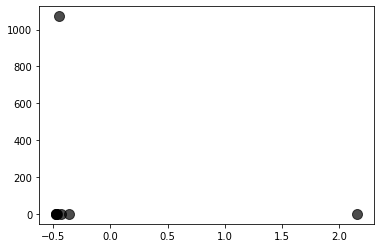

In [0]:

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7);


In [0]:
centers.shape

(8, 6)

##### correlations

In [0]:
X.columns

Index([' Bwd Packet Length Std', 'Total Length of Fwd Packets',
       ' Flow IAT Min', ' Fwd Packet Length Min', ' Flow Packets/s',
       ' Fwd Packet Length Mean'],
      dtype='object')

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random



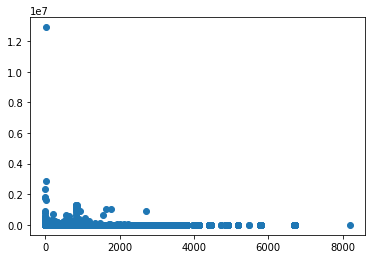

In [0]:
plt.scatter(X[' Bwd Packet Length Std'], X['Total Length of Fwd Packets'])

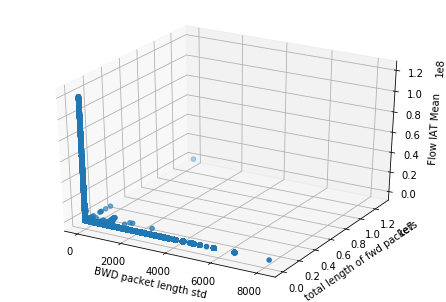

In [0]:

fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = X[' Bwd Packet Length Std'],
sequence_containing_y_vals =  X['Total Length of Fwd Packets']
sequence_containing_z_vals = X[' Flow IAT Min']

# random.shuffle(sequence_containing_x_vals)
# random.shuffle(sequence_containing_y_vals)
# random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.set_xlabel('BWD packet length std')
ax.set_ylabel('total length of fwd packets')
ax.set_zlabel('Flow IAT Mean')
pyplot.show()

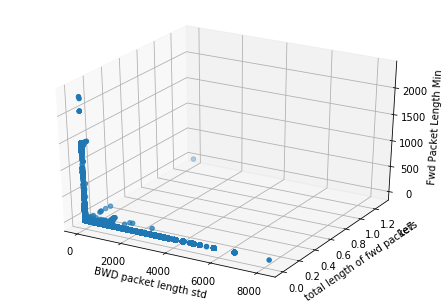

In [0]:
fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = X[' Bwd Packet Length Std'],
sequence_containing_y_vals =  X['Total Length of Fwd Packets']
sequence_containing_z_vals = X[' Fwd Packet Length Min']

# random.shuffle(sequence_containing_x_vals)
# random.shuffle(sequence_containing_y_vals)
# random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.set_xlabel('BWD packet length std')
ax.set_ylabel('total length of fwd packets')
ax.set_zlabel(' Fwd Packet Length Min')
pyplot.show()

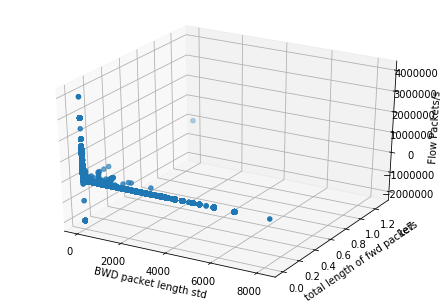

In [0]:
fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = X[' Bwd Packet Length Std'],
sequence_containing_y_vals =  X['Total Length of Fwd Packets']
sequence_containing_z_vals = X[ ' Flow Packets/s']

# random.shuffle(sequence_containing_x_vals)
# random.shuffle(sequence_containing_y_vals)
# random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.set_xlabel('BWD packet length std')
ax.set_ylabel('total length of fwd packets')
ax.set_zlabel(' Flow Packets/s')
pyplot.show()

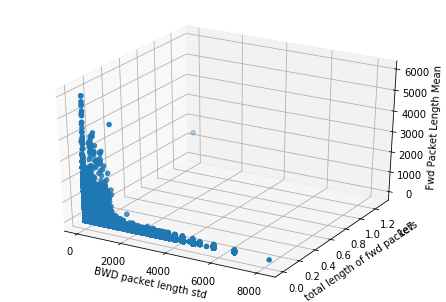

In [0]:
fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = X[' Bwd Packet Length Std'],
sequence_containing_y_vals =  X['Total Length of Fwd Packets']
sequence_containing_z_vals = X[ ' Fwd Packet Length Mean']

# random.shuffle(sequence_containing_x_vals)
# random.shuffle(sequence_containing_y_vals)
# random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.set_xlabel('BWD packet length std')
ax.set_ylabel('total length of fwd packets')
ax.set_zlabel(' Fwd Packet Length Mean')
pyplot.show()

In [0]:
del df

In [0]:
import seaborn as sns; sns.set(color_codes=True)

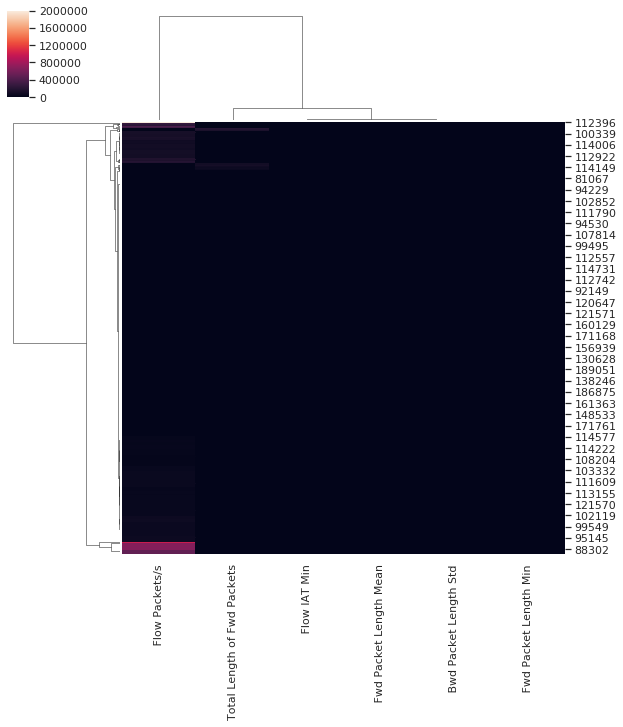

In [0]:
g = sns.clustermap(X.head(2000))

##### Auto Encoders

In [0]:
len(X.columns)

15

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
encoding_dim = 6

In [0]:
input_img = Input(shape=(15,))

In [0]:
encoded = Dense(encoding_dim, activation='')(X)

ValueError: ignored

In [0]:
X.dtypes

 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
dtype: object

In [0]:
X["Flow Bytes/s"].replace("Infinity", 0, inplace=True)
X["Flow Bytes/s"].replace(np.nan, 0, inplace=True)
X['Flow Bytes/s']=X["Flow Bytes/s"].astype("float64")

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
